# Plot One Week Analysis Result

** Author:** Cheng Hou

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
cc = plt.get_cmap(lut=5)
import os
%matplotlib inline

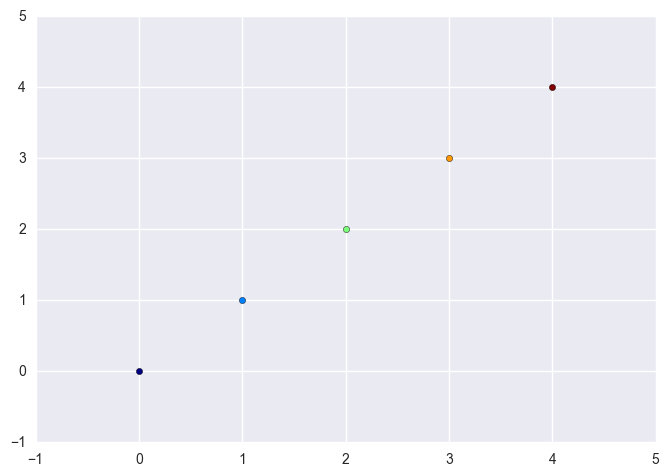

In [28]:
for i in range(5):
    plt.scatter(i,i, c=cc(i))

In [2]:
from cycler import cycler
import seaborn as sns
from shapely.geometry import Polygon
import datetime as dt

## Read Data

In [3]:
path = 'temp_usage/'
image_path = 'image/'
files = os.listdir(path)
days = list(map(lambda x: x.split('.csv')[0], files))
days

['05', '06', '07', '08', '09', '10', '11']

In [4]:
for file,day in zip(files, days):
    globals()['usage_' + day] = pd.read_csv(path+file, usecols=range(1,8))

In [5]:
usage = globals()['usage_' + days[0]].loc[:,['id', 'x', 'y']]
for day in days:
    usage['time_y_' + day] = globals()['usage_' + day]['time_y']
    usage['time_g_' + day] = globals()['usage_' + day]['time_g']
    usage['cars_y_' + day] = globals()['usage_' + day]['cars_y']
    usage['cars_g_' + day] = globals()['usage_' + day]['cars_g']

In [6]:
relief = pd.read_csv('idx.csv', index_col=0)

In [7]:
usage_time_y = []
usage_time_g = []
usage_cars_y = []
usage_cars_g = []

for day in days:
    usage_time_y.append(np.sum(globals()['usage_' + day]['time_y']))
    usage_time_g.append(np.sum(globals()['usage_' + day]['time_g']))
    usage_cars_y.append(np.sum(globals()['usage_' + day]['cars_y']))
    usage_cars_g.append(np.sum(globals()['usage_' + day]['cars_g']))

In [8]:
dtlist = pd.date_range(dt.datetime(2015,1,5), dt.datetime(2015,1,11), freq='D').to_series()

In [9]:
week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
def dayofweek(num):
    return week(num%7)

## Basic Statistics

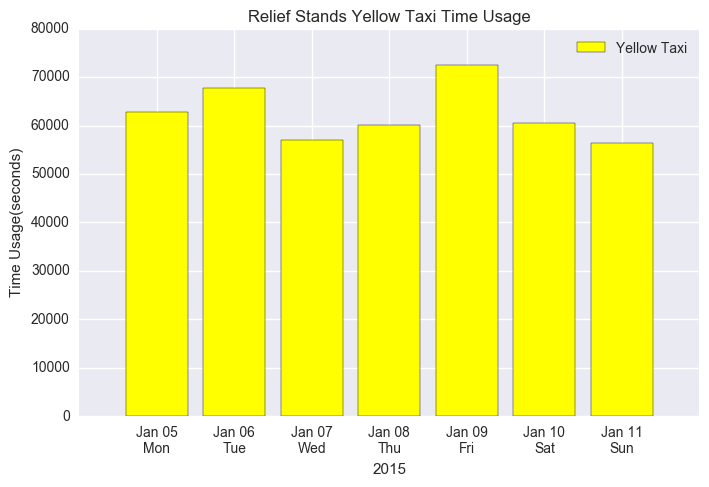

In [70]:
y_pos = np.arange(len(days))
fig = plt.figure(figsize=(8,5))
plt.bar(y_pos, usage_time_y, align='center', color='yellow', label='Yellow Taxi')
plt.xticks(y_pos, ['Jan '+date+'\n'+day for date,day in zip(days, week)])
plt.ylabel('Time Usage(seconds)')
plt.xlabel('2015')
plt.title('Relief Stands Yellow Taxi Time Usage')
plt.legend()
fig.savefig(image_path+'Time_yellow.png', bbox_inches='tight')
plt.show()

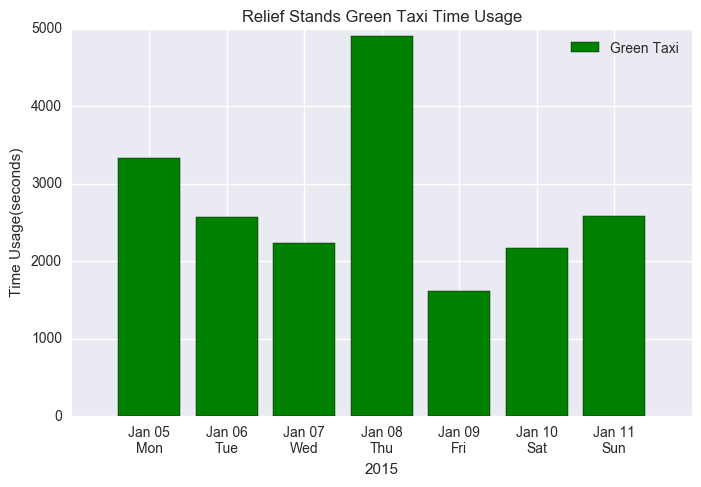

In [69]:
y_pos = np.arange(len(days))
fig = plt.figure(figsize=(8,5))
plt.bar(y_pos, usage_time_g, align='center', color='green', label='Green Taxi')
plt.xticks(y_pos, ['Jan '+date+'\n'+day for date,day in zip(days, week)])
plt.ylabel('Time Usage(seconds)')
plt.xlabel('2015')
plt.title('Relief Stands Green Taxi Time Usage')
plt.legend()
fig.savefig(image_path+'Time_green.png', bbox_inches='tight')
plt.show()

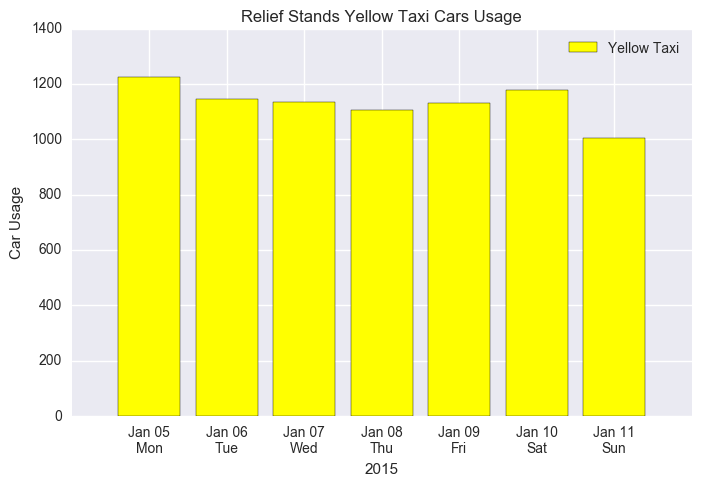

In [68]:
y_pos = np.arange(len(days))
fig = plt.figure(figsize=(8,5))
plt.bar(y_pos, usage_cars_y, align='center', color='yellow', label='Yellow Taxi')
plt.xticks(y_pos, ['Jan '+date+'\n'+day for date,day in zip(days, week)])
plt.ylabel('Car Usage')
plt.xlabel('2015')
plt.title('Relief Stands Yellow Taxi Cars Usage')
plt.legend()
fig.savefig(image_path+'Cars_yellow.png', bbox_inches='tight')
plt.show()

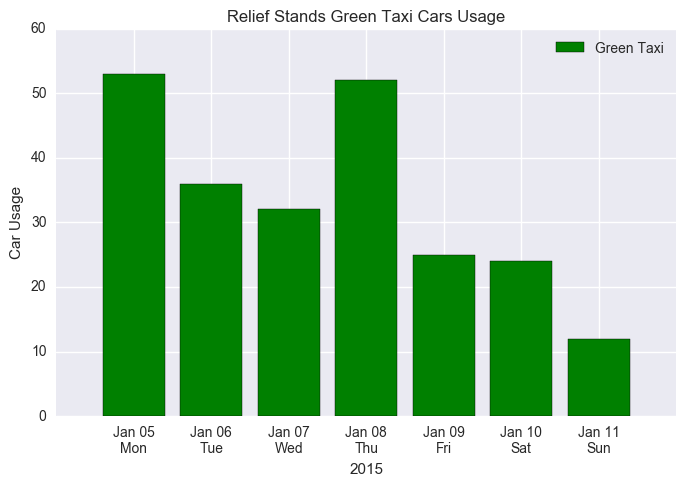

In [67]:
y_pos = np.arange(len(days))
fig = plt.figure(figsize=(8,5))
plt.bar(y_pos, usage_cars_g, align='center', color='green', label='Green Taxi')
plt.xticks(y_pos, ['Jan '+date+'\n'+day for date,day in zip(days, week)])
plt.ylabel('Car Usage')
plt.xlabel('2015')
plt.title('Relief Stands Green Taxi Cars Usage')
plt.legend()
fig.savefig(image_path+'Cars_green.png', bbox_inches='tight')
plt.show()

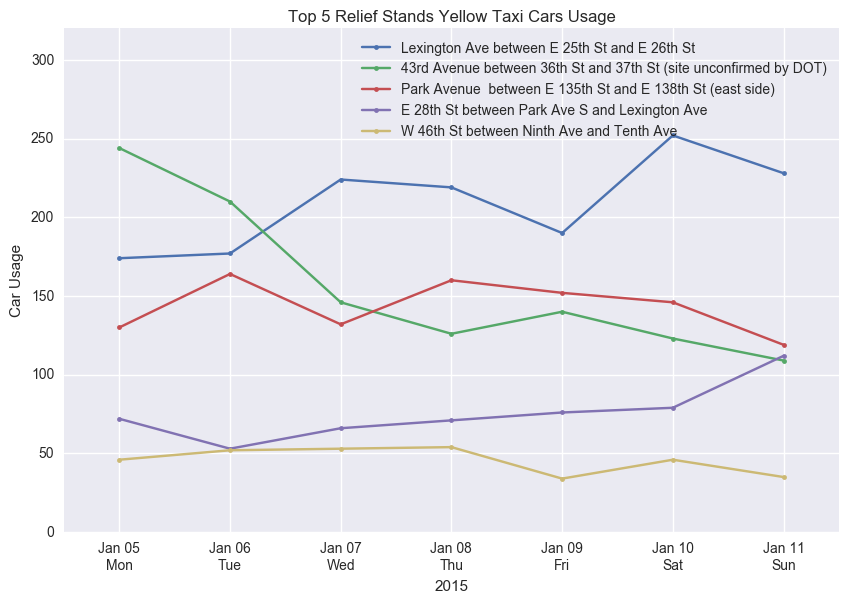

In [66]:
y_pos = np.arange(len(days))
idx_top5 = np.argsort(np.mean(usage.iloc[:,range(5,len(usage.columns),4)], axis=1))[::-1][:5].values

cc_ = []
fig = plt.figure(figsize=(10,6.5))
for i in idx_top5:
    ax=plt.plot(y_pos, usage.iloc[i,range(5,len(usage.columns),4)], '.-', 
             label= relief.loc[relief.id == int(usage.loc[i,'id']), 'location'].values[0])
    cc_.append(ax[0].get_color())

plt.xticks(y_pos, ['Jan '+date+'\n'+day for date,day in zip(days, week)])
plt.xlim(-0.5,6.5)
plt.ylim(0, 320)
plt.ylabel('Car Usage')
plt.xlabel('2015')
plt.title('Top 5 Relief Stands Yellow Taxi Cars Usage')
plt.legend()
fig.savefig(image_path+'Top10_Cars_yellow.png', bbox_inches='tight')
plt.show()

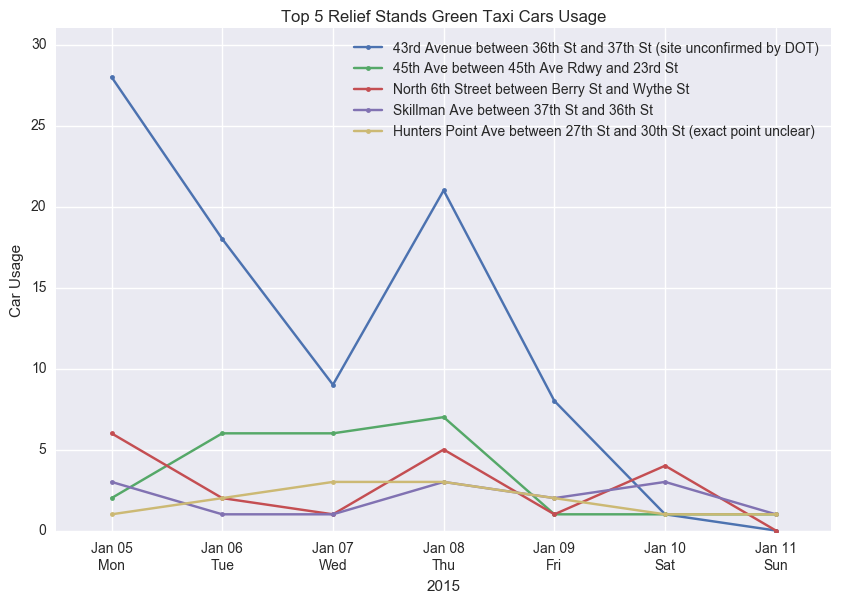

In [65]:
y_pos = np.arange(len(days))
idx_top5 = np.argsort(np.mean(usage.iloc[:,range(6,len(usage.columns),4)], axis=1))[::-1][:5].values

fig = plt.figure(figsize=(10,6.5))
for i in idx_top5:
    plt.plot(y_pos, usage.iloc[i,range(6,len(usage.columns),4)], '.-', 
             label= relief.loc[relief.id == int(usage.loc[i,'id']), 'location'].values[0])

plt.xticks(y_pos, ['Jan '+date+'\n'+day for date,day in zip(days, week)])
plt.ylim(-0.1,31)
plt.xlim(-0.5,6.5)
plt.ylabel('Car Usage')
plt.xlabel('2015')
plt.title('Top 5 Relief Stands Green Taxi Cars Usage')
plt.legend()
fig.savefig(image_path+'Top10_Cars_green.png', bbox_inches='tight')
plt.show()

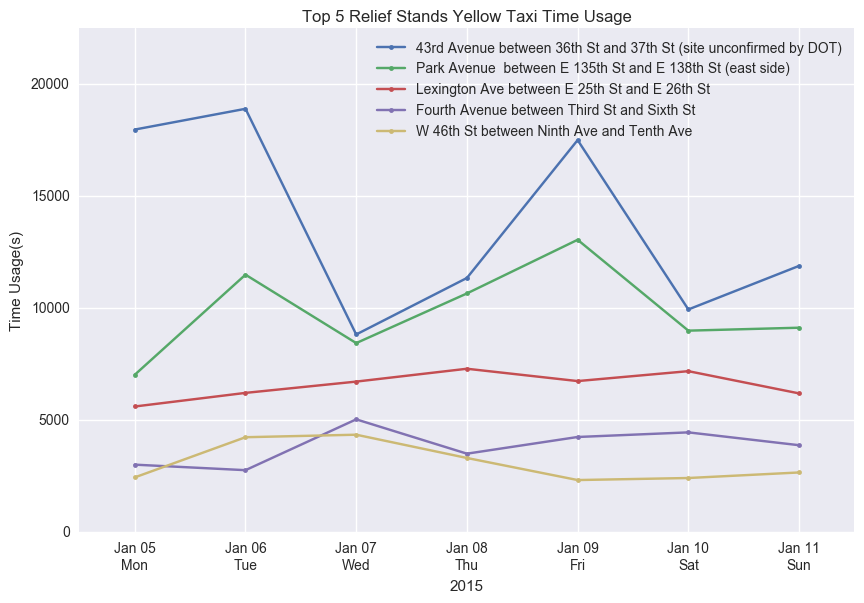

In [64]:
y_pos = np.arange(len(days))
idx_top5 = np.argsort(np.mean(usage.iloc[:,range(3,len(usage.columns),4)], axis=1))[::-1][:5].values

fig = plt.figure(figsize=(10,6.5))
for i in idx_top5:
    plt.plot(y_pos, usage.iloc[i,range(3,len(usage.columns),4)], '.-', 
             label= relief.loc[relief.id == int(usage.loc[i,'id']), 'location'].values[0])

plt.xticks(y_pos, ['Jan '+date+'\n'+day for date,day in zip(days, week)])
plt.xlim(-0.5,6.5)
plt.ylim(0,22500)
plt.ylabel('Time Usage(s)')
plt.xlabel('2015')
plt.title('Top 5 Relief Stands Yellow Taxi Time Usage')
plt.legend()
fig.savefig(image_path+'Top10_Time_yellow.png', bbox_inches='tight')
plt.show()

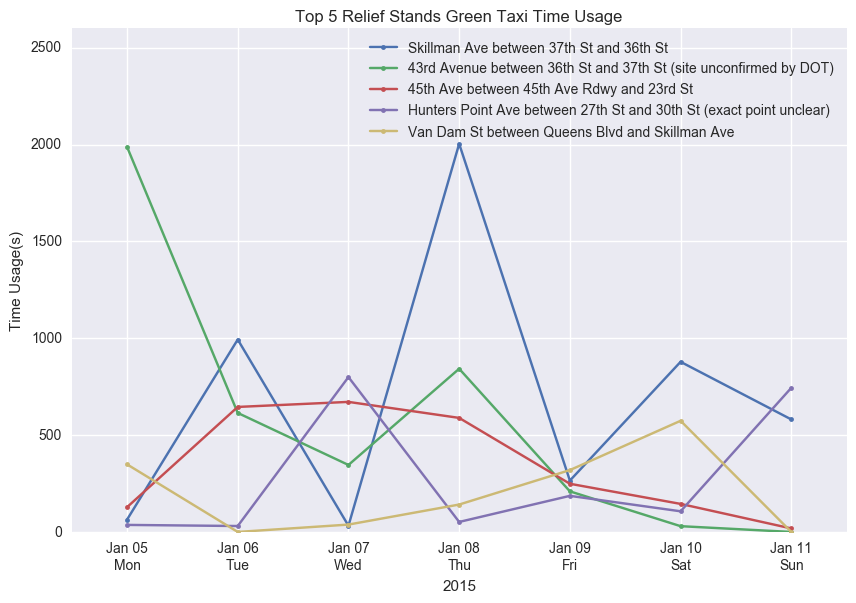

In [63]:
y_pos = np.arange(len(days))
idx_top5 = np.argsort(np.mean(usage.iloc[:,range(4,len(usage.columns),4)], axis=1))[::-1][:5].values

fig = plt.figure(figsize=(10,6.5))
for i in idx_top5:
    plt.plot(y_pos, usage.iloc[i,range(4,len(usage.columns),4)], '.-', 
             label= relief.loc[relief.id == int(usage.loc[i,'id']), 'location'].values[0])

plt.xticks(y_pos, ['Jan '+date+'\n'+day for date,day in zip(days, week)])
plt.xlim(-0.5,6.5)
plt.ylim(-1, 2600)
plt.ylabel('Time Usage(s)')
plt.xlabel('2015')
plt.title('Top 5 Relief Stands Green Taxi Time Usage')
plt.legend()
fig.savefig(image_path+'Top10_Time_green.png', bbox_inches='tight')
plt.show()

## Geo - Plot

In [10]:
ct_shape = gpd.GeoDataFrame.from_file('ct_shape/ct_shape.shp')

In [11]:
ct_shape_ = ct_shape[ct_shape.BoroName != 'Staten Island']
#zoom_in = Polygon([()])

In [12]:
hexagons = gpd.GeoDataFrame.from_file('hexagons_nyc/nyc_hexagons.shp')

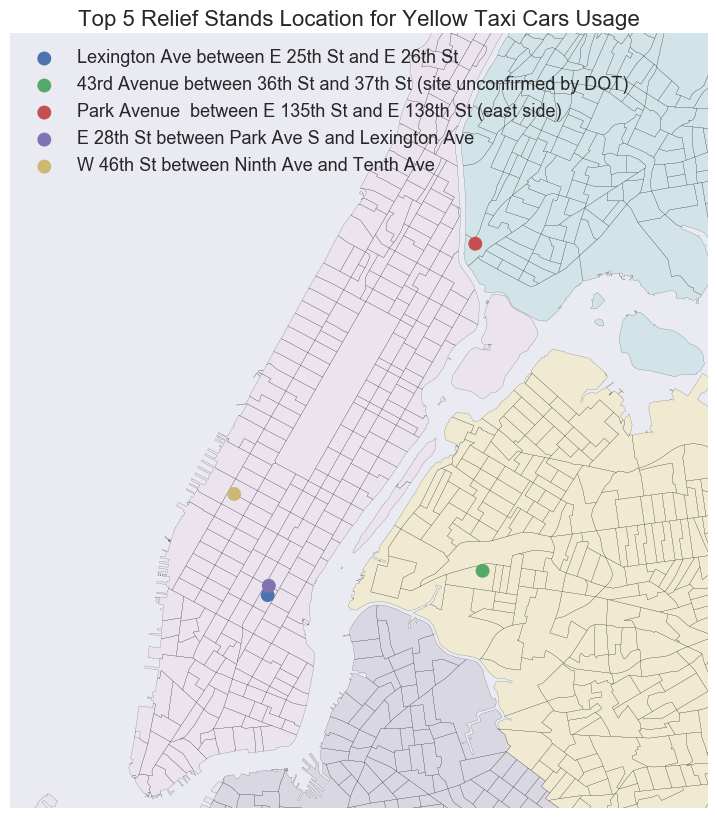

In [62]:
fig, ax = plt.subplots(figsize=(9,10))
ct_shape_.plot(ax=ax, column='BoroName', cmap=plt.cm.Set3, linewidth=0.1, alpha=0.25, zorder=1)

idx_top5 = np.argsort(np.mean(usage.iloc[:,range(5,len(usage.columns),4)], axis=1))[::-1][:5].values
for k,i in enumerate(idx_top5):
    ax.scatter(usage.x[i], usage.y[i], marker='o', s=100, c=cc_[k], edgecolor='none', zorder=2, alpha=1,
               label= relief.loc[relief.id == int(usage.loc[i,'id']), 'location'].values[0])
ax.legend(scatterpoints=1, loc=2, shadow=True, fontsize=13)
ax.set_title('Top 5 Relief Stands Location for Yellow Taxi Cars Usage', fontsize=16)
plt.xlim(-74.05, -73.87)
plt.ylim(40.698, 40.855)
plt.xticks([])
plt.yticks([])
fig.savefig(image_path+'Top5_Yellow_Cars_Usage_Location.png', bbox_inches='tight')
plt.show()

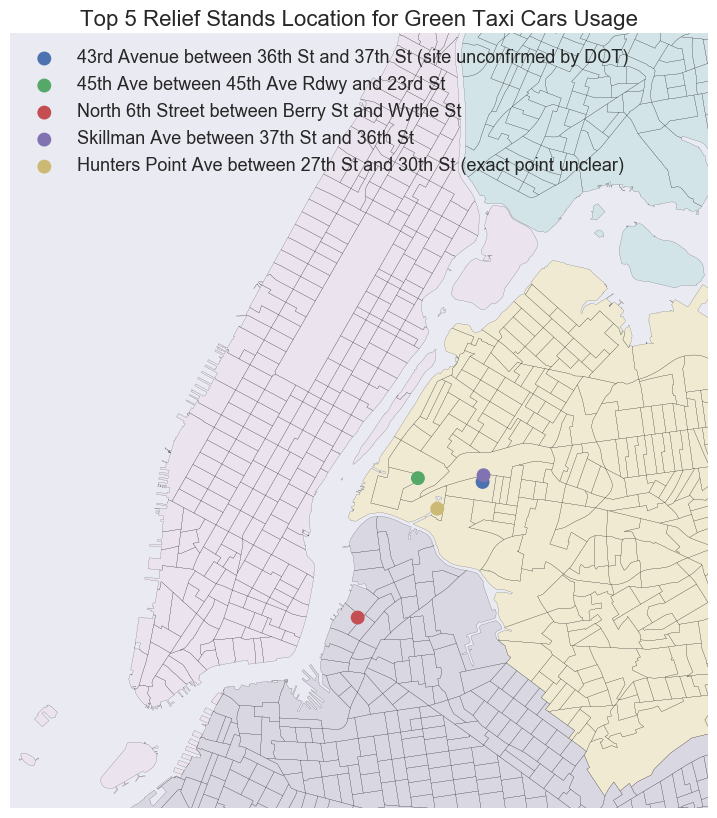

In [61]:
fig, ax = plt.subplots(figsize=(9,10))
ct_shape_.plot(ax=ax, column='BoroName', cmap=plt.cm.Set3, linewidth=0.1, alpha=0.25, zorder=1)

idx_top5 = np.argsort(np.mean(usage.iloc[:,range(6,len(usage.columns),4)], axis=1))[::-1][:5].values
for k,i in enumerate(idx_top5):
    ax.scatter(usage.x[i], usage.y[i], marker='o', s=100, c=cc_[k], edgecolor='none', zorder=2, alpha=1,
               label= relief.loc[relief.id == int(usage.loc[i,'id']), 'location'].values[0])
ax.legend(scatterpoints=1, loc=2, shadow=True, fontsize=13)
plt.xlim(-74.05, -73.87)
plt.ylim(40.68, 40.837)
plt.xticks([])
plt.yticks([])
ax.set_title('Top 5 Relief Stands Location for Green Taxi Cars Usage', fontsize=16)
fig.savefig(image_path+'Top5_Green_Cars_Usage_Location.png', bbox_inches='tight')
plt.show()

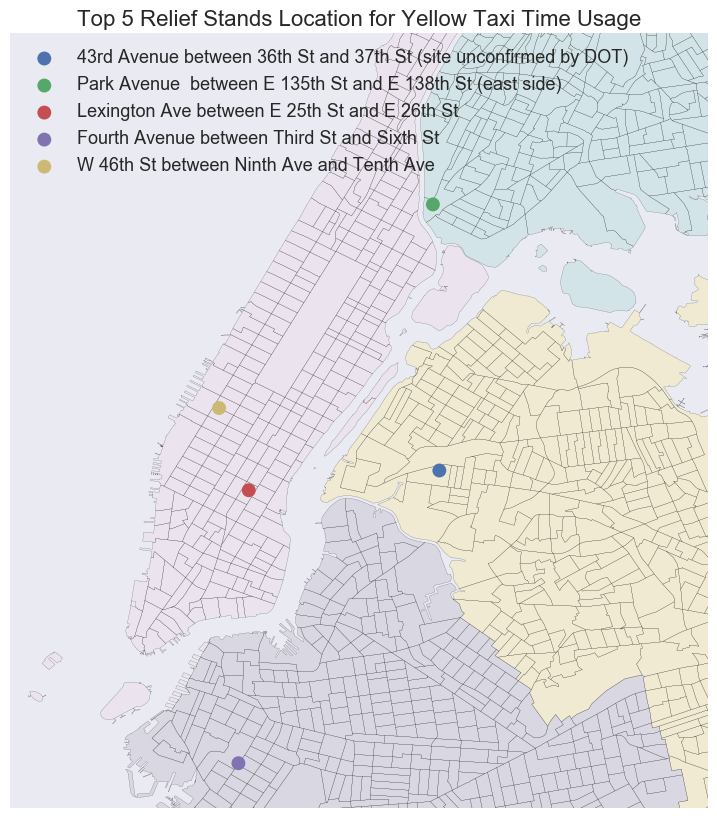

In [60]:
fig, ax = plt.subplots(figsize=(9,10))
ct_shape_.plot(ax=ax, column='BoroName', cmap=plt.cm.Set3, linewidth=0.1, alpha=0.25, zorder=1)

idx_top5 = np.argsort(np.mean(usage.iloc[:,range(3,len(usage.columns),4)], axis=1))[::-1][:5].values
for k,i in enumerate(idx_top5):
    ax.scatter(usage.x[i], usage.y[i], marker='o', s=100, c=cc_[k], edgecolor='none', zorder=2, alpha=1,
               label= relief.loc[relief.id == int(usage.loc[i,'id']), 'location'].values[0])
ax.legend(scatterpoints=1, loc=2, shadow=True, fontsize=13)
plt.xlim(-74.053, -73.85)
plt.ylim(40.662, 40.855)
plt.xticks([])
plt.yticks([])
ax.set_title('Top 5 Relief Stands Location for Yellow Taxi Time Usage', fontsize=16)
fig.savefig(image_path+'Top5_Yellow_Time_Usage_Location.png', bbox_inches='tight')
plt.show()

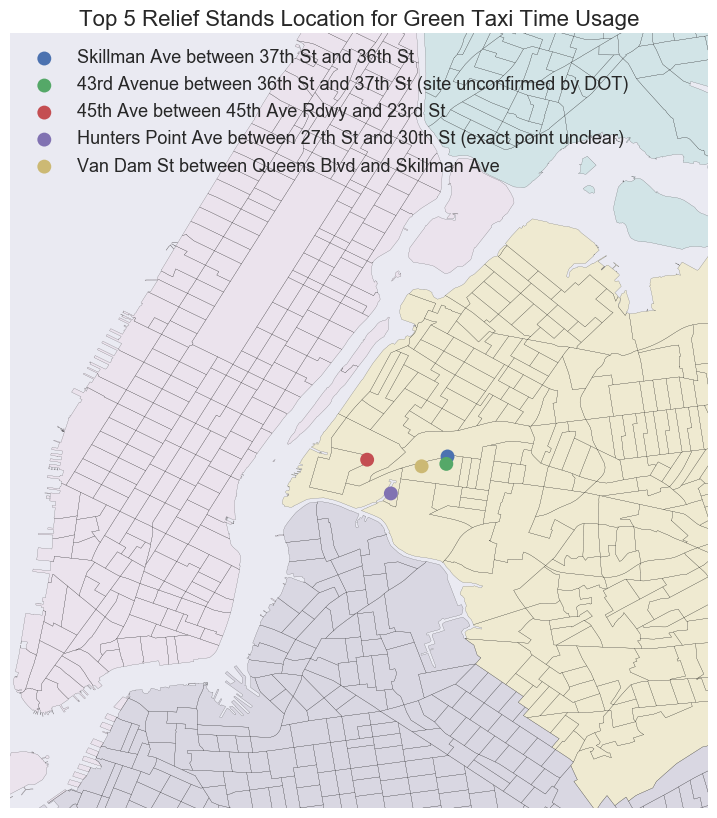

In [59]:
fig, ax = plt.subplots(figsize=(9,10))
ct_shape_.plot(ax=ax, column='BoroName', cmap=plt.cm.Set3, linewidth=0.1, alpha=0.25, zorder=1)

idx_top5 = np.argsort(np.mean(usage.iloc[:,range(4,len(usage.columns),4)], axis=1))[::-1][:5].values
for k,i in enumerate(idx_top5):
    ax.scatter(usage.x[i], usage.y[i], marker='o', s=100, c=cc_[k], edgecolor='none', zorder=2, alpha=1,
               label= relief.loc[relief.id == int(usage.loc[i,'id']), 'location'].values[0])
ax.legend(scatterpoints=1, loc=2, shadow=True, fontsize=13)
plt.xlim(-74.02, -73.873)
plt.ylim(40.683, 40.825)
plt.xticks([])
plt.yticks([])
ax.set_title('Top 5 Relief Stands Location for Green Taxi Time Usage', fontsize=16)
fig.savefig(image_path+'Top5_Green_Time_Usage_Location.png', bbox_inches='tight')
plt.show()